Q1

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

paragraph = "Steve Cohen is a prominent American billionaire and hedge fund manager, best known as the founder and CEO of Point72 Asset Management, a global multi-strategy investment firm. He launched his first major hedge fund, SAC Capital Advisors, in 1992, achieving remarkable returns and earning a reputation as one of Wall Street's most successful traders. Despite SAC Capital's impressive performance, the firm was ultimately shut down after pleading guilty to insider trading charges in 2013, resulting in $1.8 billion in fines, though Cohen himself was never personally charged. After a period during which he was barred from managing outside money, Cohen re-emerged by transforming his operations into Point72, which now manages billions in assets and serves clients worldwide. Beyond finance, Cohen is also known for his philanthropy, extensive modern art collection, and as the owner and CEO of Major League Baseball's New York Mets, reflecting his wide-ranging influence in both business and culture"

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

cleaned_text = clean_text(paragraph)

sentences = sent_tokenize(paragraph)
words_nltk = word_tokenize(paragraph)
words_python = paragraph.split()

stop_words = set(stopwords.words('english'))
words_no_stopwords = [word for word in words_nltk if word.lower() not in stop_words]


cleaned_words = [word.lower() for word in words_no_stopwords if word.isalpha()]
word_freq = Counter(cleaned_words)

for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


cohen: 4
hedge: 2
fund: 2
known: 2
ceo: 2
firm: 2
major: 2
sac: 2
capital: 2
steve: 1


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Q2

In [3]:
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)

words_no_stop = [word for word in alphabetic_words if word.lower() not in stop_words]

ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in words_no_stop]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop]

for original, stemmed, lemmatized in zip(words_no_stop[:8], stemmed_words[:8], lemmatized_words[:8]):
    print(f"Original: {original:<15} | Stemmed: {stemmed:<15} | Lemmatized: {lemmatized:<15}")

[nltk_data] Downloading package wordnet to /root/nltk_data...


Original: Steve           | Stemmed: steve           | Lemmatized: Steve          
Original: Cohen           | Stemmed: cohen           | Lemmatized: Cohen          
Original: prominent       | Stemmed: promin          | Lemmatized: prominent      
Original: American        | Stemmed: american        | Lemmatized: American       
Original: billionaire     | Stemmed: billionair      | Lemmatized: billionaire    
Original: hedge           | Stemmed: hedg            | Lemmatized: hedge          
Original: fund            | Stemmed: fund            | Lemmatized: fund           
Original: manager         | Stemmed: manag           | Lemmatized: manager        


Q3

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "Goldman Sachs partners with Abu Dhabi's Mubadala in $1 billion private credit initiative, signaling Middle East's growing appeal for hedge funds.",
    "Hedge funds give up half of 2025 gains amid tech selloff and tariff-driven market volatility, with stock pickers posting negative returns for the year.",
    "Global hedge funds slash holdings in 'Magnificent Seven' megacap stocks to two-year low ahead of earnings season, reflecting cautious sentiment."
]

count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(texts)

feature_names = count_vectorizer.get_feature_names_out()
for i, text in enumerate(texts):
    print(f"\nText {i+1}:")
    nonzero_indices = bow_matrix[i].nonzero()[1]
    counts = zip(nonzero_indices, bow_matrix[i].toarray()[0][nonzero_indices])
    for idx, count in counts:
        print(f"  {feature_names[idx]}: {count}")


Text 1:
  goldman: 1
  sachs: 1
  partners: 1
  with: 1
  abu: 1
  dhabi: 1
  mubadala: 1
  in: 1
  billion: 1
  private: 1
  credit: 1
  initiative: 1
  signaling: 1
  middle: 1
  east: 1
  growing: 1
  appeal: 1
  for: 1
  hedge: 1
  funds: 1

Text 2:
  with: 1
  for: 1
  hedge: 1
  funds: 1
  give: 1
  up: 1
  half: 1
  of: 1
  2025: 1
  gains: 1
  amid: 1
  tech: 1
  selloff: 1
  and: 1
  tariff: 1
  driven: 1
  market: 1
  volatility: 1
  stock: 1
  pickers: 1
  posting: 1
  negative: 1
  returns: 1
  the: 1
  year: 1

Text 3:
  in: 1
  hedge: 1
  funds: 1
  of: 1
  year: 1
  global: 1
  slash: 1
  holdings: 1
  magnificent: 1
  seven: 1
  megacap: 1
  stocks: 1
  to: 1
  two: 1
  low: 1
  ahead: 1
  earnings: 1
  season: 1
  reflecting: 1
  cautious: 1
  sentiment: 1


In [21]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()

for i, text in enumerate(texts):
    print(f"\nText {i+1}:")
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    top_indices = np.argsort(tfidf_scores)[-3:][::-1]
    print("Top keywords:")
    for idx in top_indices:
        print(f"  {feature_names[idx]}: {tfidf_scores[idx]:.4f}")


Text 1:
Top keywords:
  signaling: 0.2395
  sachs: 0.2395
  private: 0.2395

Text 2:
Top keywords:
  volatility: 0.2131
  tariff: 0.2131
  up: 0.2131

Text 3:
Top keywords:
  two: 0.2329
  to: 0.2329
  sentiment: 0.2329


In [23]:
print("Interpretation:")
if i == 0:
    print("  Words like 'goldman', 'sachs', and 'mubadala' highlight that this news is about")
    print("  a specific partnership between Goldman Sachs and Abu Dhabi's investment company.")
    print("  The keywords directly identify the key players in this $1 billion deal.")
elif i == 1:
    print("  Terms like 'gains', 'volatility', and 'returns' show this news focuses on")
    print("  hedge fund performance issues, specifically their losses after market troubles.")
    print("  These words point to the financial results being reported.")
else:
    print("  'magnificent', 'seven', and 'megacap' reveal this news is specifically about")
    print("  hedge funds reducing investments in major tech stocks (the 'Magnificent Seven').")
    print("  These terms identify exactly which stocks are being sold off.")

Interpretation:
  'magnificent', 'seven', and 'megacap' reveal this news is specifically about
  hedge funds reducing investments in major tech stocks (the 'Magnificent Seven').
  These terms identify exactly which stocks are being sold off.


Q4

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tech_text1 = """Artificial Intelligence (AI) and Machine Learning: These technologies are employed to analyze vast datasets, improve investment predictions, automate signal discovery, and enhance portfolio construction. AI helps reduce information asymmetry and provides more accurate forecasts than traditional human analysis."""

tech_text2 = """High-Frequency Trading (HFT) Technology: This involves ultra-fast algorithmic trading systems that execute large numbers of trades at very high speeds, leveraging low-latency networks and advanced coding to capitalize on small market inefficiencies. It requires specialized infrastructure and technical expertise."""

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

ai_tokens = preprocess_text(tech_text1)
hft_tokens = preprocess_text(tech_text2)

ai_set = set(ai_tokens)
hft_set = set(hft_tokens)
intersection = ai_set.intersection(hft_set)
union = ai_set.union(hft_set)
jaccard_sim = len(intersection) / len(union)

print(f"\nJaccard Similarity: {jaccard_sim:.4f}")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([tech_text1, tech_text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

print(f"Cosine Similarity: {cosine_sim:.4f}")



Jaccard Similarity: 0.0000
Cosine Similarity: 0.0820


In [8]:
print("Cosine Similarity provides better insights")

Cosine Similarity provides better insights


Q5

In [24]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
review = """Tried Claude for a few weeks now and honestly, I'm impressed. It's super helpful for brainstorming and writing—feels more natural than ChatGPT sometimes. Love how it keeps up with long convos and remembers context better, so it doesn't lose track like others do. Coding help is solid, though not perfect, but it's made my workflow way faster. Only downside is the usage limits can be annoying, and sometimes it over-apologizes or refuses stuff for no reason. Still, for most tasks, Claude just "gets it." """

blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"polarity: {polarity:.4f} ")
print(f"subjectivity: {subjectivity:.4f}")

polarity: 0.1449 
subjectivity: 0.5897


In [25]:
if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Review classified as: {sentiment}")

Review classified as: Positive


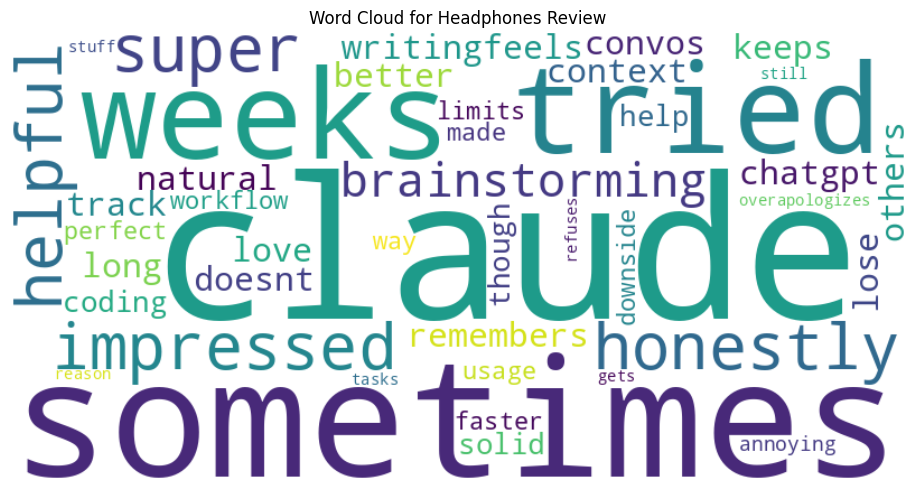

In [26]:
if sentiment == "Positive":
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text

    cleaned_review = clean_text(review)

    stop_words = set(stopwords.words('english'))
    review_words = word_tokenize(cleaned_review)
    filtered_words = [word for word in review_words
                     if word.lower() not in stop_words and len(word) > 2]

    filtered_text = ' '.join(filtered_words)

    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=50,
                          contour_width=1).generate(filtered_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Headphones Review')
    plt.tight_layout()
    plt.show()

Q6

In [13]:
!pip install tensorflow

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

Q6.1

In [17]:
paragraph = "Steve Cohen is a prominent American billionaire and hedge fund manager, best known as the founder and CEO of Point72 Asset Management, a global multi-strategy investment firm. He launched his first major hedge fund, SAC Capital Advisors, in 1992, achieving remarkable returns and earning a reputation as one of Wall Street's most successful traders. Despite SAC Capital's impressive performance, the firm was ultimately shut down after pleading guilty to insider trading charges in 2013, resulting in $1.8 billion in fines, though Cohen himself was never personally charged. After a period during which he was barred from managing outside money, Cohen re-emerged by transforming his operations into Point72, which now manages billions in assets and serves clients worldwide. Beyond finance, Cohen is also known for his philanthropy, extensive modern art collection, and as the owner and CEO of Major League Baseball's New York Mets, reflecting his wide-ranging influence in both business and culture"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])

sequences = []
words = paragraph.split()
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    sequences.append(tokenized_seq)

padded = pad_sequences(sequences)
print("Sample of padded sequences:")
print(padded[:3])

X = padded[:, :-1]
y = padded[:, -1]

Sample of padded sequences:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0 22  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0 22  3 10]
 [ 0  

Q6.2

In [18]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                   output_dim=50,
                   input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("\nModel summary:")
model.summary()


Model summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Q6.3

In [19]:
print("\nTraining the model...")
model.fit(X, y, epochs=50, verbose=1)

def generate_text(seed_text, next_words, model, max_sequence_len):
    result = seed_text

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word
        result += " " + output_word

    return result

seed_words = ["Steve", "finance", "billion"]
for seed in seed_words:
    generated = generate_text(seed, 10, model, X.shape[1])
    print(f"\nSeed: '{seed}'")
    print(f"Generated text: '{generated}'")


Training the model...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.0035 - loss: 4.7628
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.0594 - loss: 4.7541
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.0860 - loss: 4.7435
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.0612 - loss: 4.7294
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.0545 - loss: 4.6690
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0449 - loss: 4.5746
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.0524 - loss: 4.5925
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.0611 - loss: 4.5470
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.0620 - loss: 4.5055
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.0607 - loss: 4.4591
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0642 - loss: 4.4055
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accura